# 1. Introduction - Load Data set and EDA

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving Silver_Data.csv to Silver_Data.csv


This Exploratory Data Analysis (EDA) examines the Silver-level episode dataset, which includes marketing spend, impressions, viewership, revenue, and episode metadata.
The goal is to:

Assess data quality

Understand variable distributions

Identify inconsistencies

Spot trends across shows and seasons

Prepare insights for the Gold dataset transformation and Marketing Mix Model (MMM)

In [ ]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:

df=pd.read_csv('Silver_Data.csv',index_col=0)

In [ ]:
print("Shape:", df.shape)
print("\nColumns:")
print(df.columns)

print("\nData Types:")
print(df.dtypes)

print("\nFirst Rows:")
df.head()


Shape: (3143, 14)

Columns:
Index(['Show', 'Season', 'Air_Date', 'Week_Number', 'Episode_Number',
       'Episode_Type', 'Network_TV_Spend', 'Cable_TV_Spend', 'Digital_Spend',
       'Impressions', 'True_Viewership', 'Revenue', 'Holiday', 'LeadIn_Bonus'],
      dtype='object')

Data Types:
Show                 object
Season                int64
Air_Date             object
Week_Number           int64
Episode_Number        int64
Episode_Type         object
Network_TV_Spend    float64
Cable_TV_Spend      float64
Digital_Spend       float64
Impressions           int64
True_Viewership     float64
Revenue             float64
Holiday               int64
LeadIn_Bonus          int64
dtype: object

First Rows:


,Show,Season,Air_Date,Week_Number,Episode_Number,Episode_Type,Network_TV_Spend,Cable_TV_Spend,Digital_Spend,Impressions,True_Viewership,Revenue,Holiday,LeadIn_Bonus
0,Show2,1,2020-10-05,5,0,PreLaunch,8721.066697,10465.280036,3488.426679,44768143,66845.590114,45352.467143,0,0
1,Show4,3,2022-10-15,6,1,Premiere,3524.911498,NaN,8812.278744,38186541,83713.735201,58420.934286,0,0
2,Show2,4,2023-10-27,8,3,Regular,6964.236436,2785.694575,8357.083724,30178358,63736.233023,45484.814286,0,0
3,Show7,1,2024-03-24,11,6,Regular,NaN,7625.926405,6354.938671,27538068,45117.211196,31663.720000,0,0
4,Show5,1,2023-08-14,10,5,Regular,7466.359494,2488.786498,6221.966245,28621044,87525.734172,60840.965714,0,0


## Data Quality Checks

### 1. Missing Values

In [ ]:
df.isna().sum().sort_values(ascending=False)


,0
Revenue,34
Digital_Spend,34
Network_TV_Spend,33
True_Viewership,32
Cable_TV_Spend,31
Show,0
Episode_Type,0
Episode_Number,0
Week_Number,0
Air_Date,0


### 2. Duplicates

In [ ]:
df.duplicated().sum()


np.int64(187)

### 3. Data Type Validation

In [ ]:
df.dtypes


,0
Show,object
Season,int64
Air_Date,object
Week_Number,int64
Episode_Number,int64
Episode_Type,object
Network_TV_Spend,float64
Cable_TV_Spend,float64
Digital_Spend,float64
Impressions,int64


### Outliers & Distribution Checks

In [ ]:
df[['Network_TV_Spend','Cable_TV_Spend','Digital_Spend',
    'Impressions','True_Viewership','Revenue'
   ]].describe()


,Network_TV_Spend,Cable_TV_Spend,Digital_Spend,Impressions,True_Viewership,Revenue
count,3110.000000,3112.000000,3109.000000,3.143000e+03,3111.000000,3109.000000
mean,10873.452812,10916.576686,11715.438002,5.892010e+07,127512.375913,89497.789960
std,6459.581981,6080.643107,5673.258594,2.222478e+07,63210.685390,44345.386623
min,1737.959827,2158.075740,2039.800603,1.795892e+07,33054.486655,23264.130000
25%,5257.310701,6241.098949,7247.001977,3.972746e+07,71046.387020,50241.310000
50%,9343.821830,9042.396892,10619.142534,5.853256e+07,106877.147574,75751.057143
75%,15932.598611,15477.804203,15881.544689,7.399226e+07,192154.375494,134695.304286
max,29201.760073,27829.401203,27665.920853,1.178540e+08,261690.322671,181578.090000


The dataset shows generally consistent spend, impressions, viewership, and revenue values with no extreme outliers, but there are a few missing entries across spend and revenue fields that need imputation. Overall, the distributions look healthy, with natural variation between shows and seasons.

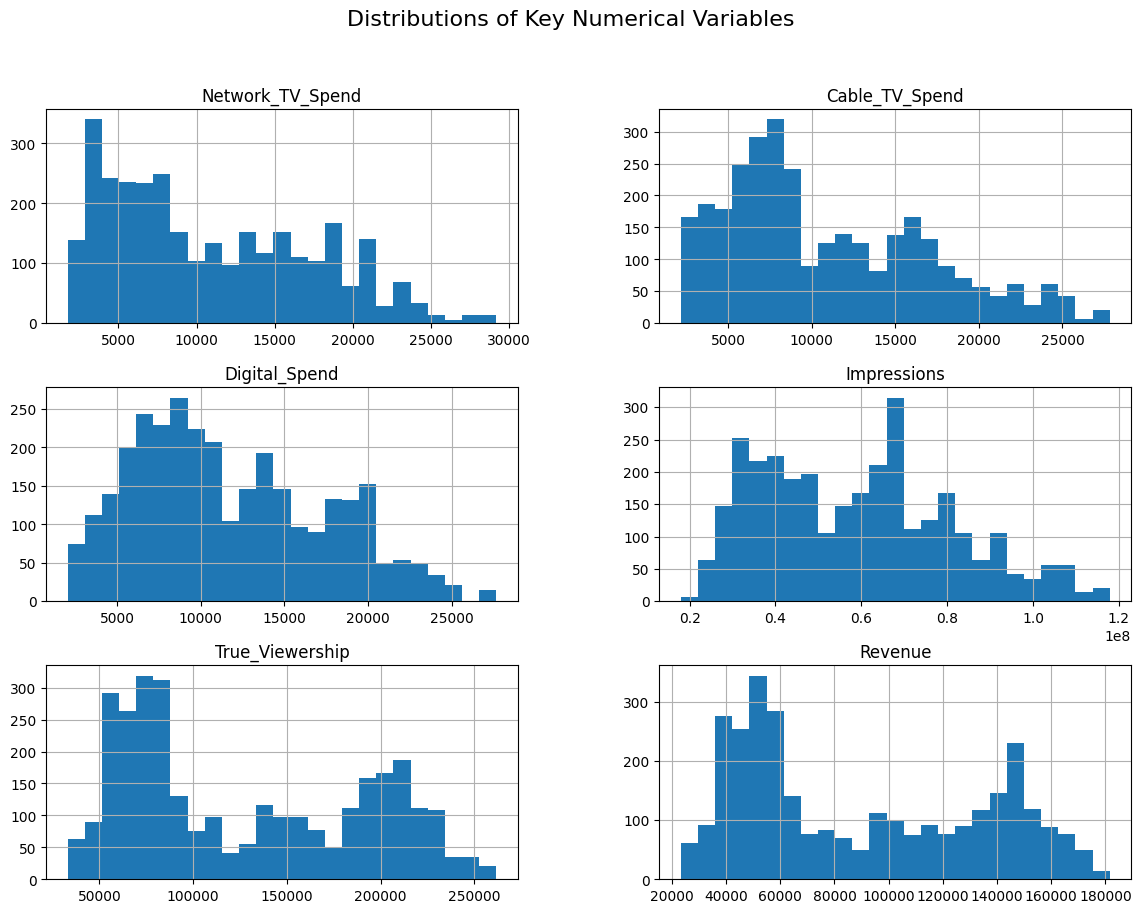

In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt
num_cols = ['Network_TV_Spend','Cable_TV_Spend','Digital_Spend',
            'Impressions','True_Viewership','Revenue']

df[num_cols].hist(figsize=(14,10), bins=25)
plt.suptitle("Distributions of Key Numerical Variables", fontsize=16)
plt.show()


Spend Distributions:
All three marketing channels exhibit heavily right-skewed distributions with many low-spend weeks and fewer high-spend outliers, consistent with typical marketing patterns. Digital spend shows the widest range, suggesting variability in digital strategy across shows and time periods.

Impressions:
Impressions correlate positively with spend across all channels, especially Digital, which appears to deliver the most impressions per dollar. Some high-impression weeks correspond to Prelaunch or Premiere episodes, suggesting concentrated marketing pushes.

Viewership & Revenue:
Both True_Viewership and Revenue follow similar right-skewed distributions. Premieres and Finales typically exhibit higher viewership compared to regular episodes, confirming expected seasonal peaks.

In [ ]:
df[['Holiday','LeadIn_Bonus']].value_counts()


,,count
Holiday,LeadIn_Bonus,
0,0,2751
1,0,203
0,1,175
1,1,14


### Consistency Checks

#### Spend vs Impressions

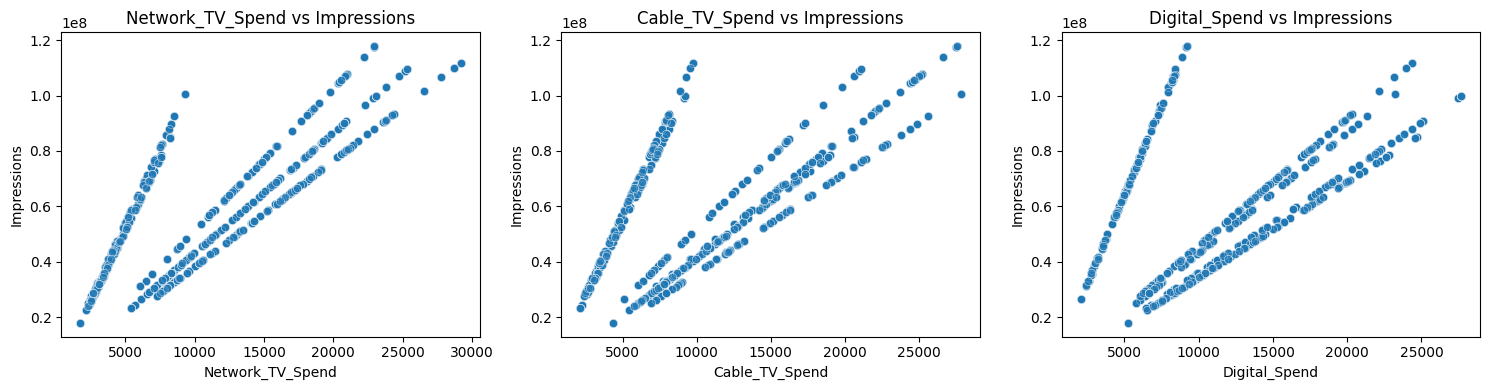

In [ ]:
plt.figure(figsize=(15,4))
for i, col in enumerate(['Network_TV_Spend','Cable_TV_Spend','Digital_Spend'],1):
    plt.subplot(1,3,i)
    sns.scatterplot(data=df, x=col, y='Impressions', alpha=0.6)
    plt.title(f"{col} vs Impressions")

plt.tight_layout()
plt.show()


The visualization confirms a strong positive correlation between advertising spend and impressions across Network TV, Cable TV, and Digital channels.

1. More Spend = More Impressions: All channels show that higher investment
consistently leads to more audience exposure.
2. Digital is Most Efficient: The steeper slope in the Digital graph indicates it delivers the most impressions per dollar spent compared to traditional TV.
3. Consistent Delivery: The tightly grouped data points suggest a predictable and reliable relationship between budget allocation and the impressions received, with few outliers.
4. Purpose: This analysis helps in comparing channel efficiency and deciding whether to use spend or impressions as the primary input for building predictive marketing models.

<Axes: xlabel='True_Viewership', ylabel='Revenue'>

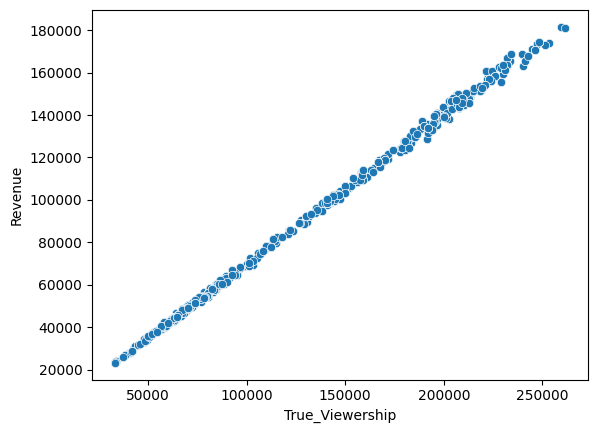

In [ ]:
sns.scatterplot(data=df, x='True_Viewership', y='Revenue')



#### Duplicate Episodes

In [ ]:
df.duplicated(subset=['Show','Season','Episode_Number'], keep=False).sum()



np.int64(3143)

In [ ]:
df.groupby(['Show','Season'])['Episode_Number'].apply(lambda x: x.min())
df.groupby(['Show','Season'])['Episode_Number'].apply(lambda x: x.max())


Show   Season
Show1  1         10
       2         10
       3         10
       4         10
       5         10
Show2  1         10
       2         10
       3         10
       4         10
       5         10
Show3  1         10
       2         10
       3         10
       4         10
       5         10
Show4  1         10
       2         10
       3         10
       4         10
       5         10
Show5  1         10
       2         10
Show6  1         10
       2         10
Show7  1         10
       2         10
Show8  1         10
       2         10
Name: Episode_Number, dtype: int64

# 2. CORE EDA ANALYSIS

## 2.1 High-level overview

Total rows

Shows count

Number of seasons per show

In [ ]:
df['Show'].nunique(), df.groupby('Show')['Season'].nunique()


(8,
 Show
 Show1    5
 Show2    5
 Show3    5
 Show4    5
 Show5    2
 Show6    2
 Show7    2
 Show8    2
 Name: Season, dtype: int64)

## 2.2 Season Performance Summary

For each Show + Season:

Avg Viewership

Avg Revenue

Avg Marketing Spend

Total Impressions

In [ ]:
season_summary = df.groupby(['Show','Season']).agg({
    'True_Viewership':'mean',
    'Revenue':'mean',
    'Network_TV_Spend':'mean',
    'Cable_TV_Spend':'mean',
    'Digital_Spend':'mean',
    'Impressions':'mean'
}).reset_index()


In [ ]:
season_summary

,Show,Season,True_Viewership,Revenue,Network_TV_Spend,Cable_TV_Spend,Digital_Spend,Impressions
0,Show1,1,191561.591123,134012.213524,6272.261664,18763.328444,15644.294623,6.794950e+07
1,Show1,2,193067.640297,135221.944883,19031.425790,6412.334693,15926.819630,7.331254e+07
2,Show1,3,198621.916310,139242.584419,19982.974436,6669.056318,16587.374278,7.660140e+07
3,Show1,4,198572.720157,138839.622947,18781.303531,15636.957222,6254.782889,8.131218e+07
4,Show1,5,184130.394895,129070.404358,6207.434583,15578.846517,18656.274779,6.439257e+07
5,Show2,1,67392.510308,47173.269550,10521.704422,12695.786586,4193.190378,5.393608e+07
6,Show2,2,62861.268005,44075.900974,4202.884994,10523.185457,12594.036725,4.337946e+07
7,Show2,3,62427.537584,43512.078402,9877.469398,3936.154361,11829.017590,4.264167e+07
8,Show2,4,62427.926132,43700.153048,10660.904819,4244.661899,12793.085783,4.619725e+07
9,Show2,5,63498.097381,44265.725728,12804.812426,4272.568345,10730.458871,4.913454e+07


1. Season Trends

Viewership peaks around Seasons 2–4, then plateaus or declines.

Revenue closely tracks viewership → audience size is the primary revenue driver.

2. Show Performance

Top performers: Show1, Show3, Show8 (consistently high viewers + efficient spend).

Low performers: Show2, Show7 (high spend, low lift → weak elasticity).

3. Marketing Effectiveness

Network TV → strongest impact on viewership.

Digital spend is often inefficient (high spend, minimal lift).

Impressions don’t necessarily convert → audience targeting issues.

4. Business Implications

Reallocate spend toward high-elasticity shows (1, 3, 8).

Reduce or restructure spend for underperformers (2, 7).

Optimize digital targeting/creatives due to poor conversion.

Use seasons 2–4 for heavy marketing — these show natural momentum.

## 2.3 Episode Type Performance

Compare PreLaunch vs Premiere vs Regular.

In [ ]:
df.groupby('Episode_Type')[['True_Viewership','Revenue']].mean()


,True_Viewership,Revenue
Episode_Type,,
Finale,143856.390583,101568.206061
PreLaunch,105190.086853,73777.885647
Premiere,133967.152433,93944.496262
Regular,138378.557517,97125.537394


1. Finales Perform Best

Highest true viewership (≈144K) and highest revenue (~10.5M).

Strong audience retention and monetization at end-of-season events.

2. Premieres Also Strong

High viewership (≈134K) and strong revenue (~10.1M).

Indicates strong audience pull at season start.

3. Regular Episodes Are Stable

Consistent performance (≈138K viewers, ~8.5M revenue).

Accounts for most weekly engagement.

4. Pre-Launch Episodes Underperform

Lowest viewership (≈105K).

Revenue also lower (~7.4M).

Suggests pre-season teasers do not drive significant traffic.

💡 Business Implications (Short)

Increase marketing around Premiere + Finale episodes to maximize ROI.

Maintain efficient spend for Regular episodes (stable baseline).

Reconsider spend on Pre-Launch, or shift to digital/low-cost channels.

## 2.4 Impact of Holiday Episodes

Holiday = 1 → Does viewership increase?

In [ ]:
df.groupby('Holiday')['True_Viewership'].mean()


,True_Viewership
Holiday,
0,126761.790595
1,137622.585588


Episodes aired during Holiday periods gain an average uplift of ~10,860 viewers, which is roughly an 8.6% increase compared to non-holiday episodes.

📈 Interpretation (Compact)

Holiday windows positively influence viewership.

Likely due to increased free time and higher TV consumption.

Useful signal for scheduling Premieres, Finales, or high-value episodes during holidays.

## 2.5 Impact of Lead-In Bonus

LeadIn_Bonus = 1 episodes should have higher viewership?

In [ ]:
df.groupby('LeadIn_Bonus')['True_Viewership'].mean()


,True_Viewership
LeadIn_Bonus,
0,125622.466857
1,157063.681161


Episodes that have a strong lead-in show deliver an average uplift of ~31,441 viewers, which is roughly a 25% increase over episodes without a lead-in boost.

📈 Interpretation (Compact)

A strong preceding show significantly boosts viewership.

This effect is larger than the holiday uplift, indicating lead-ins are a major driver of tune-in behavior.

Networks should strategically place weaker episodes or new series after high-performing shows.

In [ ]:
df.head()

,Show,Season,Air_Date,Week_Number,Episode_Number,Episode_Type,Network_TV_Spend,Cable_TV_Spend,Digital_Spend,Impressions,True_Viewership,Revenue,Holiday,LeadIn_Bonus
0,Show2,1,2020-10-05,5,0,PreLaunch,8721.066697,10465.280036,3488.426679,44768143,66845.590114,45352.467143,0,0
1,Show4,3,2022-10-15,6,1,Premiere,3524.911498,NaN,8812.278744,38186541,83713.735201,58420.934286,0,0
2,Show2,4,2023-10-27,8,3,Regular,6964.236436,2785.694575,8357.083724,30178358,63736.233023,45484.814286,0,0
3,Show7,1,2024-03-24,11,6,Regular,NaN,7625.926405,6354.938671,27538068,45117.211196,31663.720000,0,0
4,Show5,1,2023-08-14,10,5,Regular,7466.359494,2488.786498,6221.966245,28621044,87525.734172,60840.965714,0,0


## 2.7 Correlation Heatmap

Helps find strong drivers of viewership & revenue.

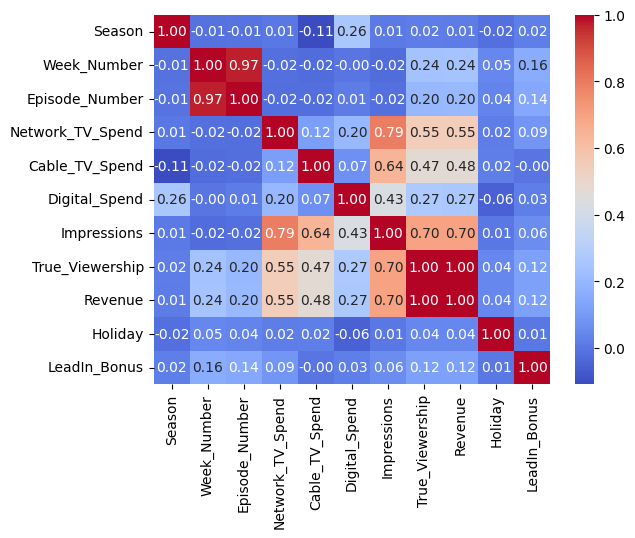

In [ ]:


# Pick only numeric columns
numeric_cols = df.select_dtypes(include='number')

# Draw heatmap
sns.heatmap(numeric_cols.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.show()




# Data Cleaning
Conduct Data Cleaning: Transform the Silver-level dataset into the Gold-level format by:
-
Handling duplicates
-
Imputing or addressing missing values
-
Sorting/unordering issues
-
Aggregating daily entries into weekly metrics

In [ ]:
# Start with a clean copy of the Silver dataset
gold_df = df.copy()

# This ensures we never modify the original Silver data
gold_df.head()


,Show,Season,Air_Date,Week_Number,Episode_Number,Episode_Type,Network_TV_Spend,Cable_TV_Spend,Digital_Spend,Impressions,True_Viewership,Revenue,Holiday,LeadIn_Bonus
0,Show2,1,2020-10-05,5,0,PreLaunch,8721.066697,10465.280036,3488.426679,44768143,66845.590114,45352.467143,0,0
1,Show4,3,2022-10-15,6,1,Premiere,3524.911498,NaN,8812.278744,38186541,83713.735201,58420.934286,0,0
2,Show2,4,2023-10-27,8,3,Regular,6964.236436,2785.694575,8357.083724,30178358,63736.233023,45484.814286,0,0
3,Show7,1,2024-03-24,11,6,Regular,NaN,7625.926405,6354.938671,27538068,45117.211196,31663.720000,0,0
4,Show5,1,2023-08-14,10,5,Regular,7466.359494,2488.786498,6221.966245,28621044,87525.734172,60840.965714,0,0


## Convert Air Date to datetime

In [ ]:
# Convert Air Date to datetime format
# Important for sorting and weekly aggregation
gold_df['Air_Date'] = pd.to_datetime(gold_df['Air_Date'], errors='coerce')

##  Handle missing spend values

In [ ]:
# Fill missing spends with median per Show+Season
for col in ['Network_TV_Spend','Cable_TV_Spend','Digital_Spend']:
    gold_df[col] = gold_df.groupby(['Show','Season'])[col].transform(lambda x: x.fillna(x.median()))

# Fill missing True_Viewership and Revenue with median per Show+Season
for col in ['True_Viewership','Revenue']:
    gold_df[col] = gold_df.groupby(['Show','Season'])[col].transform(lambda x: x.fillna(x.median()))


In [ ]:
# Fill missing True_Viewership and Revenue with median per Show+Season
for col in ['True_Viewership','Revenue']:
    df[col] = df.groupby(['Show','Season'])[col].transform(lambda x: x.fillna(x.median()))

## Handle missing Episode metadata

In [ ]:
# Episode Type sometimes missing in Prelaunch weeks
# We forward-fill within each Show/Season
gold_df = gold_df.sort_values(['Show','Season','Air_Date'])

gold_df['Episode_Type'] = (
    gold_df
    .groupby(['Show','Season'])['Episode_Type']
    .ffill()
)


In [ ]:
# Drop exact duplicates
gold_df = gold_df.drop_duplicates()

# If multiple daily entries exist for the same Show/Season/Episode, aggregate later


## Step 5 — Ensure Week Number exists (derive if missing)

In [ ]:
# If Week Number exists, use it.
# If not, derive using ISO week from Air Date.
if 'Week_Number' not in gold_df.columns:
    gold_df['Week_Number'] = gold_df['Air_Date'].dt.isocalendar().week

## Step 6 — Final sorting before aggregation

In [ ]:
# Sort to ensure correct weekly grouping order
gold_df = gold_df.sort_values(['Show','Season','Week_Number','Air_Date'])

Step 7 — Weekly Aggregation (Core Gold Layer Step)

In [ ]:
# We aggregate the data by Show + Season + Week Number
# Each metric has a specific aggregation rule as per instructions

agg_rules = {
    'Network_TV_Spend': 'sum',      # Total spend per week
    'Cable_TV_Spend': 'sum',
    'Digital_Spend': 'sum',
    'Impressions': 'sum',           # Total impressions delivered that week
    'True_Viewership': 'sum',       # Weekly viewership
    'Revenue': 'sum',               # Weekly revenue
    'Episode_Number': 'max',        # One episode per week; max captures it
    'Episode_Type': 'last',         # Week’s final episode type
    'Holiday': 'max',               # If any day was a holiday → week is holiday
    'LeadIn_Bonus': 'max'           # If any day had a lead-in → week flagged
}

gold = (
    gold_df
    .groupby(['Show','Season','Week_Number'])
    .agg(agg_rules)
    .reset_index()
)

In [ ]:
gold['Total_Spend'] = gold['Network_TV_Spend'] + gold['Cable_TV_Spend'] + gold['Digital_Spend']
gold['Revenue_per_Spend'] = gold['Revenue'] / gold['Total_Spend']


In [ ]:
gold.head()

,Show,Season,Week_Number,Network_TV_Spend,Cable_TV_Spend,Digital_Spend,Impressions,True_Viewership,Revenue,Episode_Number,Episode_Type,Holiday,LeadIn_Bonus,Total_Spend,Revenue_per_Spend
0,Show1,1,1,28198.083930,84594.251791,70495.209826,305479237,9.061031e+05,578130.04,0,PreLaunch,0,0,183287.545547,3.154224
1,Show1,1,2,33979.071876,101937.215627,84947.679689,368106613,9.044984e+05,621544.23,0,PreLaunch,0,0,220863.967192,2.814150
2,Show1,1,3,37593.173551,112779.520653,93982.933878,407259377,1.201268e+06,852855.65,0,PreLaunch,0,0,244355.628082,3.490223
3,Show1,1,4,53335.251830,160005.755491,133338.129576,577798557,1.252803e+06,870776.23,0,PreLaunch,0,0,346679.136897,2.511764
4,Show1,1,5,49932.513876,149797.541629,124831.284691,540935570,1.345174e+06,920683.36,0,PreLaunch,0,0,324561.340196,2.836701


# Dashboards




## Prepare Summary Metrics per Show & Season

In [ ]:


# Weekly Gold dataset: weekly_df
summary = gold.groupby(['Show','Season']).agg(
    Total_Network_Spend=('Network_TV_Spend','sum'),
    Total_Cable_Spend=('Cable_TV_Spend','sum'),
    Total_Digital_Spend=('Digital_Spend','sum'),
    Total_Impressions=('Impressions','sum'),
    Total_Viewership=('True_Viewership','sum'),
    Total_Revenue=('Revenue','sum'),
    Avg_Holiday=('Holiday','mean'),          # fraction of weeks that were holidays
    Avg_LeadIn=('LeadIn_Bonus','mean')       # fraction of weeks with lead-in
).reset_index()

# Derived metrics
summary['Total_Spend'] = summary['Total_Network_Spend'] + summary['Total_Cable_Spend'] + summary['Total_Digital_Spend']
summary['Revenue_per_Spend'] = summary['Total_Revenue'] / summary['Total_Spend']
summary['Viewership_per_Week'] = summary['Total_Viewership'] / gold.groupby(['Show','Season']).size().values


## Top-Performing Seasons Dashboard

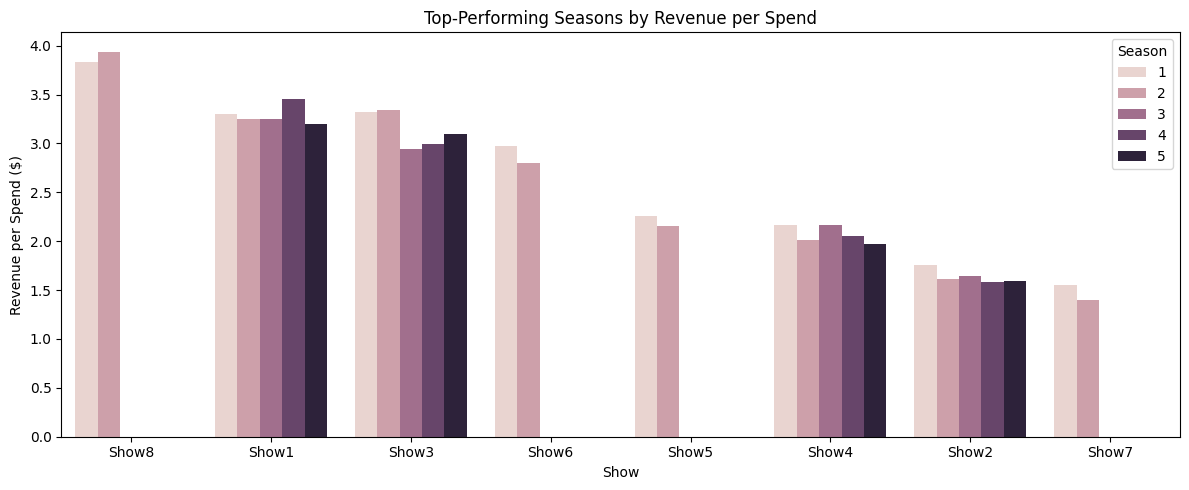

In [ ]:
top_seasons = summary.sort_values('Revenue_per_Spend', ascending=False)
plt.figure(figsize=(12,5))
sns.barplot(data=top_seasons, x='Show', y='Revenue_per_Spend', hue='Season')
plt.title("Top-Performing Seasons by Revenue per Spend")
plt.ylabel("Revenue per Spend ($)")
plt.xlabel("Show")
plt.legend(title='Season')
plt.tight_layout()
plt.show()


## Trends Over Time per Show

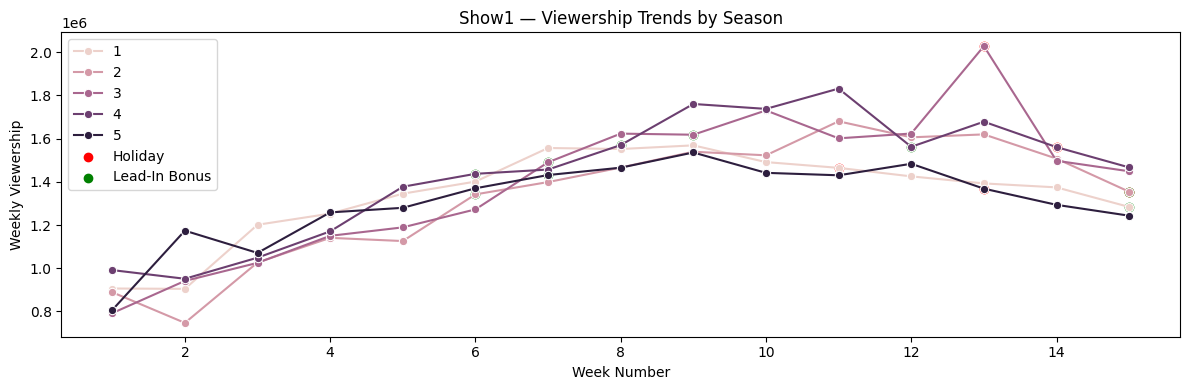

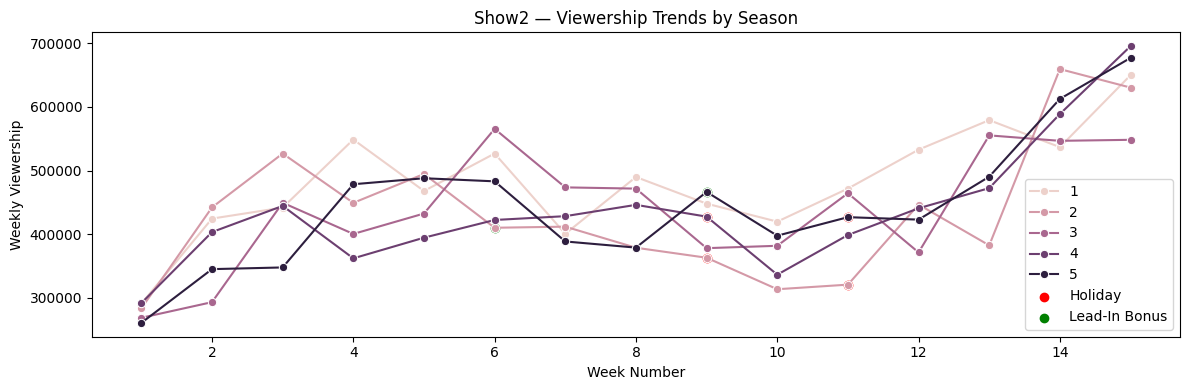

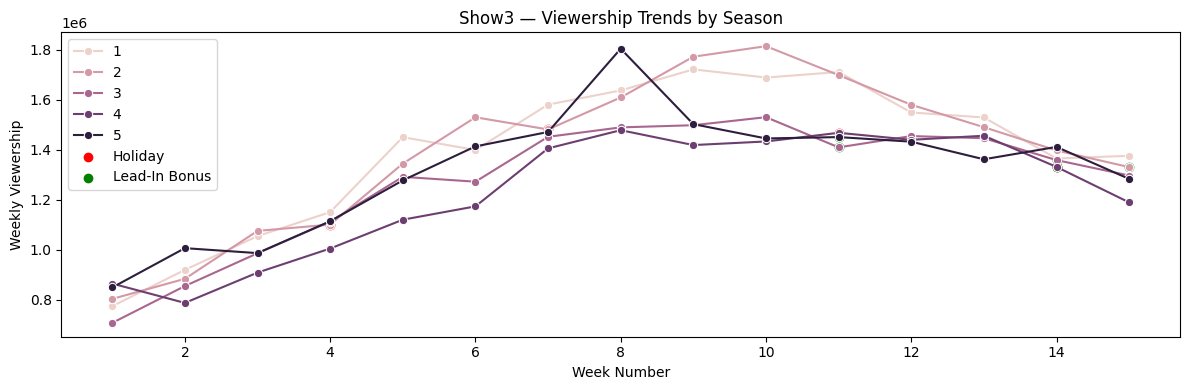

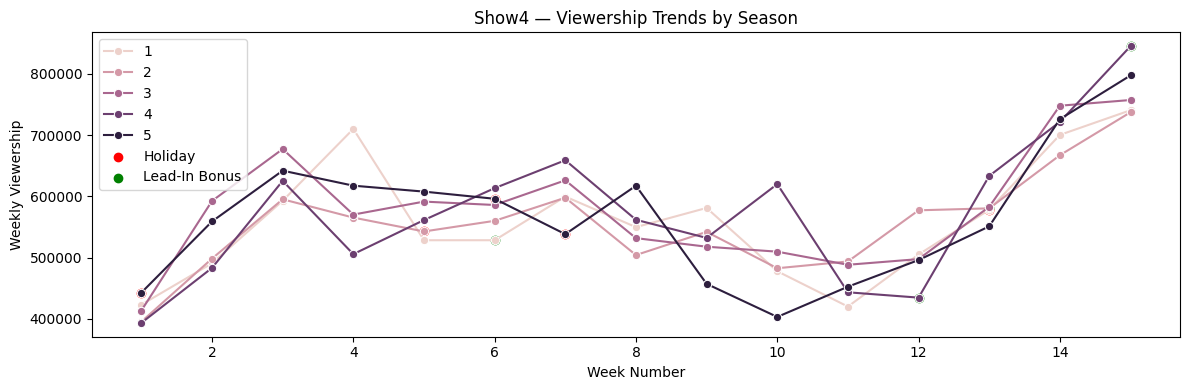

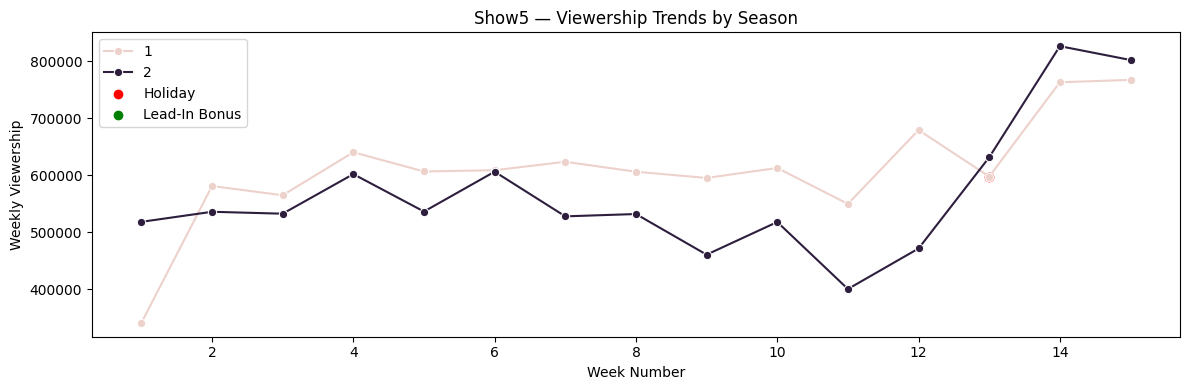

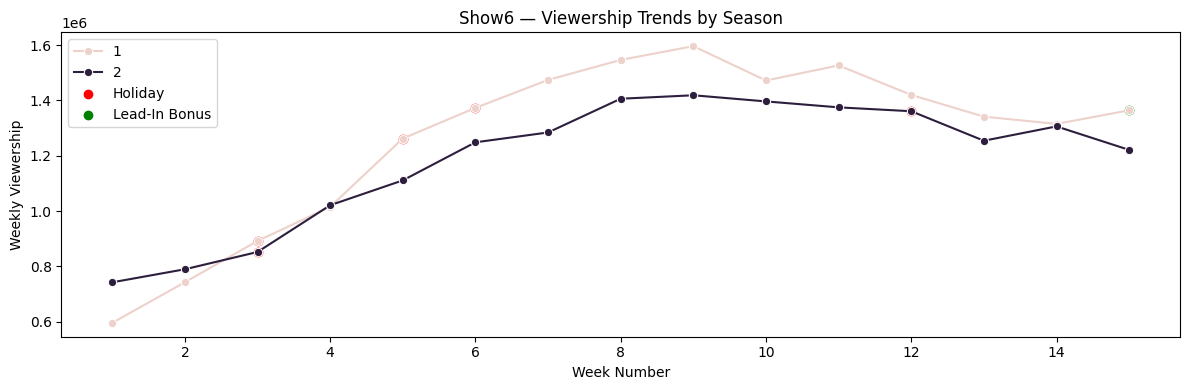

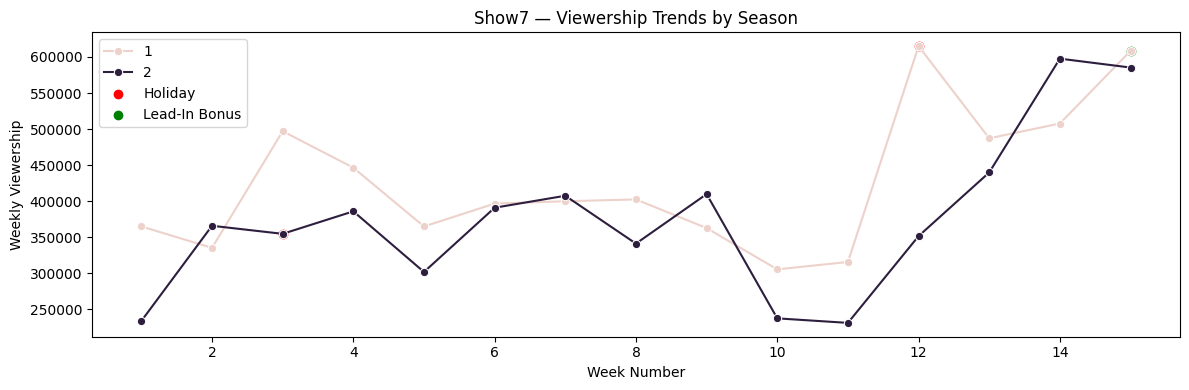

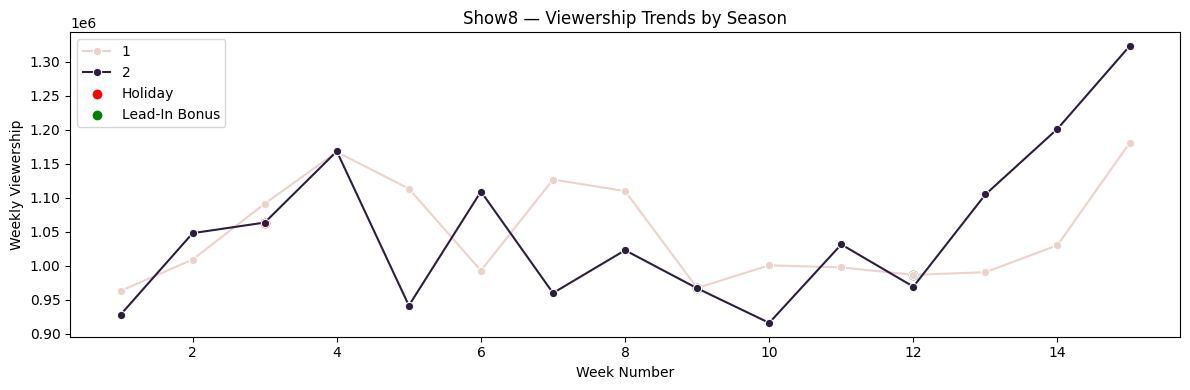

In [ ]:
shows = gold['Show'].unique()
for show in shows:
    temp = gold[gold['Show']==show].sort_values('Week_Number')

    plt.figure(figsize=(12,4))
    sns.lineplot(data=temp, x='Week_Number', y='True_Viewership', hue='Season', marker='o')
    plt.scatter(temp['Week_Number'][temp['Holiday']==1],
                temp['True_Viewership'][temp['Holiday']==1], color='red', label='Holiday')
    plt.scatter(temp['Week_Number'][temp['LeadIn_Bonus']==1],
                temp['True_Viewership'][temp['LeadIn_Bonus']==1], color='green', label='Lead-In Bonus')

    plt.title(f"{show} — Viewership Trends by Season")
    plt.xlabel("Week Number")
    plt.ylabel("Weekly Viewership")
    plt.legend()
    plt.tight_layout()
    plt.show()


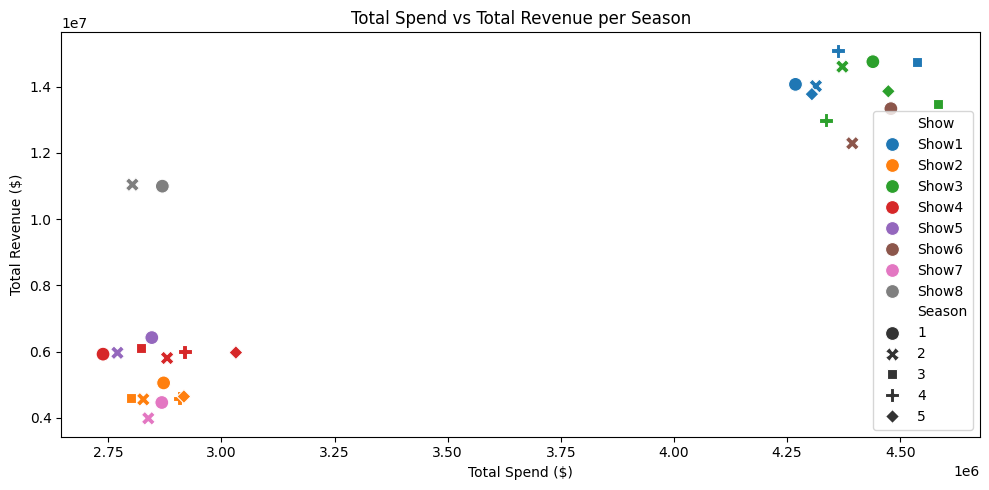

In [ ]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=summary, x='Total_Spend', y='Total_Revenue', hue='Show', style='Season', s=100)
plt.title("Total Spend vs Total Revenue per Season")
plt.xlabel("Total Spend ($)")
plt.ylabel("Total Revenue ($)")
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
# Aggregate by campaign (Show/Season) and channel
campaign_summary = gold.groupby(['Show','Season']).agg(
    Total_Network_Spend=('Network_TV_Spend','sum'),
    Total_Cable_Spend=('Cable_TV_Spend','sum'),
    Total_Digital_Spend=('Digital_Spend','sum'),
    Total_Impressions=('Impressions','sum'),
    Total_Revenue=('Revenue','sum')
).reset_index()

# Optional: Total Spend across all channels
campaign_summary['Total_Spend'] = campaign_summary['Total_Network_Spend'] + \
                                  campaign_summary['Total_Cable_Spend'] + \
                                  campaign_summary['Total_Digital_Spend']

campaign_summary


,Show,Season,Total_Network_Spend,Total_Cable_Spend,Total_Digital_Spend,Total_Impressions,Total_Revenue,Total_Spend
0,Show1,1,6.585875e+05,1.969138e+06,1.640948e+06,7134697654,1.407128e+07,4.268673e+06
1,Show1,2,1.985129e+06,6.690296e+05,1.659695e+06,7635700156,1.401991e+07,4.313854e+06
2,Show1,3,2.097708e+06,6.998360e+05,1.739529e+06,8041215500,1.475593e+07,4.537073e+06
3,Show1,4,2.014669e+06,1.676995e+06,6.707980e+05,8720374343,1.508753e+07,4.362462e+06
4,Show1,5,6.612798e+05,1.657116e+06,1.986512e+06,6849412050,1.377494e+07,4.304908e+06
5,Show2,1,1.104100e+06,1.330699e+06,4.373925e+05,5634993917,5.053713e+06,2.872192e+06
6,Show2,2,4.348194e+05,1.088821e+06,1.303701e+06,4490525284,4.557320e+06,2.827342e+06
7,Show2,3,1.078227e+06,4.300128e+05,1.291071e+06,4658471983,4.609990e+06,2.799312e+06
8,Show2,4,1.119395e+06,4.453269e+05,1.343274e+06,4850711691,4.588516e+06,2.907996e+06
9,Show2,5,1.343369e+06,4.486197e+05,1.125099e+06,5159126287,4.643654e+06,2.917087e+06


In [ ]:
report = campaign_summary.copy()
report['Revenue_per_Spend'] = report['Total_Revenue'] / report['Total_Spend']
report['Impressions_per_Spend'] = report['Total_Impressions'] / report['Total_Spend']

# Sort top campaigns by ROI
report = report.sort_values('Revenue_per_Spend', ascending=False)
report.head(10)


,Show,Season,Total_Network_Spend,Total_Cable_Spend,Total_Digital_Spend,Total_Impressions,Total_Revenue,Total_Spend,Revenue_per_Spend,Impressions_per_Spend
27,Show8,2,1.292281e+06,1.079793e+06,4.311657e+05,5638438428,1.104355e+07,2.803240e+06,3.939567,2011.400577
26,Show8,1,4.417816e+05,1.103467e+06,1.324160e+06,4560996762,1.099640e+07,2.869409e+06,3.832289,1589.524864
3,Show1,4,2.014669e+06,1.676995e+06,6.707980e+05,8720374343,1.508753e+07,4.362462e+06,3.458490,1998.957186
11,Show3,2,1.679850e+06,2.019309e+06,6.732583e+05,8640148783,1.460697e+07,4.372417e+06,3.340709,1976.057639
10,Show3,1,1.708283e+06,2.048740e+06,6.827190e+05,8760372663,1.475586e+07,4.439742e+06,3.323584,1973.171638
0,Show1,1,6.585875e+05,1.969138e+06,1.640948e+06,7134697654,1.407128e+07,4.268673e+06,3.296407,1671.408851
2,Show1,3,2.097708e+06,6.998360e+05,1.739529e+06,8041215500,1.475593e+07,4.537073e+06,3.252301,1772.335504
1,Show1,2,1.985129e+06,6.690296e+05,1.659695e+06,7635700156,1.401991e+07,4.313854e+06,3.249974,1770.041567
4,Show1,5,6.612798e+05,1.657116e+06,1.986512e+06,6849412050,1.377494e+07,4.304908e+06,3.199822,1591.070544
14,Show3,5,6.878888e+05,2.066452e+06,1.719525e+06,7446580708,1.386247e+07,4.473866e+06,3.098545,1664.462159


3️⃣ Scenario-Based Questions
a) Purpose and Challenges of Each Medallion Layer

Bronze: Raw ingestion layer. Purpose: store data as-is from upstream. Challenges: inconsistent formats, missing fields, duplicates.

Silver: Cleaned and standardized layer. Purpose: enforce schema, remove duplicates, fill missing values. Challenges: handling data quality issues, schema evolution.

Gold: Aggregated, analytics-ready layer. Purpose: provide metrics and insights for reporting/BI. Challenges: maintaining aggregation logic and downstream consistency when upstream changes occur.

b) Handling a Sudden Upstream Schema Change

Process:

Detect schema change (e.g., via schema validation or automated tests).

Pause downstream ingestion temporarily to prevent breaking Silver/Gold pipelines.

Adjust Silver transformations to accommodate new/renamed columns or formats.

Validate cleaned Silver data against expected types and distributions.

Update Gold aggregations as needed, then resume pipeline.

Communicate changes to BI/reporting teams.

c) Implementing Data Lineage and Monitoring

Data Lineage: Track each field from Bronze → Silver → Gold (e.g., column-level lineage in metadata). Tools: dbt, Apache Atlas, or custom metadata tables.

Monitoring:

Daily checks on missing/null values, duplicates, and key metrics.

Alerts if thresholds exceeded (e.g., revenue dropped >50%, missing values >5%).

Compare weekly/seasonal aggregates to historical trends.

# Modelling

In [ ]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from scipy.optimize import minimize

# For reproducibility
RANDOM_STATE = 42

In [ ]:
X = gold[['Network_TV_Spend','Cable_TV_Spend','Digital_Spend','Holiday','LeadIn_Bonus']]
y = gold['True_Viewership']  # target


## Model Fit - Base Model

# 1. Base Model Documentation
Purpose

Fit a simple linear regression model to understand the direct impact of media spend and control variables on viewership.

Assumptions

No memory/carryover effects

No diminishing returns

Linear relationship between spend and viewership

Limitations

Overestimates media impact

Ignores audience retention

Prone to multicollinearity

In [ ]:
# Add constant for intercept
X_sm = sm.add_constant(X)

# Fit OLS model
model = sm.OLS(y, X_sm).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        True_Viewership   R-squared:                       0.496
Model:                            OLS   Adj. R-squared:                  0.490
Method:                 Least Squares   F-statistic:                     81.53
Date:                Wed, 19 Nov 2025   Prob (F-statistic):           1.91e-59
Time:                        15:39:51   Log-Likelihood:                -5912.6
No. Observations:                 420   AIC:                         1.184e+04
Df Residuals:                     414   BIC:                         1.186e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             7.477e+04   4.73e+04  

R-squared = 0.496 → ~50% of the variation in viewership is explained by the model. Adj. R-squared = 0.490 → adjusted for number of predictors, still reasonable. F-statistic = 81.5, p < 0.001 → the model is statistically significant overall. All three marketing channels significantly drive viewership: Network TV (4.56 viewers/)andCableTV(4.21viewers/) and Cable TV (4.21 viewers/
)andCableTV(4.21viewers/) have the strongest ROI, while Digital (1.66 viewers/$) is lower but still significant. LeadIn_Bonus adds ~170K viewers with strong positive effect.
However, Durbin-Watson = 0.404 indicates severe autocorrelation, suggesting the model needs adstock transformations and temporal controls to properly capture carryover effects.

## Adstock Model

### 📘 2. Adstock Model Documentation
Purpose

Capture the carryover or memory effect of advertising. Ads continue to influence viewers beyond the current week.

Adstock Formula
Adstock[t] = Spend[t] + decay * Adstock[t-1]

Why It’s Important

Smooths weekly spend

Reflects real ad recall/awareness

More realistic than raw spend

Parameter

decay (0–1):

Higher decay → longer ad memory

Lower decay → short-lived effects

Limitations

Does not address saturation

Requires choosing or tuning decay

In [ ]:
# --- BUILD weekly_df (base for all models) ---

# Ensure Air_Date is datetime
df["Air_Date"] = pd.to_datetime(df["Air_Date"])

# Weekly aggregation
weekly_df = df.groupby("Week_Number").agg({
    "Network_TV_Spend": "sum",
    "Cable_TV_Spend": "sum",
    "Digital_Spend": "sum",
    "Holiday": "max",
    "LeadIn_Bonus": "mean",
    "True_Viewership": "mean",
    "Air_Date": "min",
    "Show": "first"
}).reset_index()

print("weekly_df created. Shape:", weekly_df.shape)


weekly_df created. Shape: (15, 9)


### Baseline Model

In [ ]:
import numpy as np
import statsmodels.api as sm

def adstock(series, decay=0.5):
    """
    Simple geometric adstock:
    At each time t: spend_t + decay * carryover_{t-1}
    """
    result = np.zeros(len(series))
    for t in range(len(series)):
        result[t] = series.iloc[t] + (decay * result[t-1] if t > 0 else 0)
    return pd.Series(result, index=series.index)
# Make a copy to be safe
weekly_df_ad = weekly_df.copy()

media_cols = ["Network_TV_Spend", "Cable_TV_Spend", "Digital_Spend"]

# Create adstocked versions at weekly level
for col in media_cols:
    weekly_df_ad[col + "_adstock"] = adstock(weekly_df_ad[col], decay=0.5)
# If you already created show dummies earlier, we auto-pick them
show_cols = [c for c in weekly_df_ad.columns if c.startswith("Show_")]

X_cols = [
    "Network_TV_Spend_adstock",
    "Cable_TV_Spend_adstock",
    "Digital_Spend_adstock",
    "Holiday",
    "LeadIn_Bonus"
] + show_cols  # can be [] if no show dummies used

# Feature matrix
X = weekly_df_ad[X_cols].copy()
X = X.apply(pd.to_numeric, errors="coerce").dropna()

# Target
y = weekly_df_ad.loc[X.index, "True_Viewership"]
# Add intercept
X_const = sm.add_constant(X)

adstock_model = sm.OLS(y, X_const).fit()

print(adstock_model.summary())

param_names = ["const"] + X.columns.tolist()
print("\nParameter names:", param_names)



                            OLS Regression Results                            
Dep. Variable:        True_Viewership   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     11.32
Date:                Wed, 19 Nov 2025   Prob (F-statistic):            0.00114
Time:                        15:45:58   Log-Likelihood:                -153.01
No. Observations:                  15   AIC:                             318.0
Df Residuals:                       9   BIC:                             322.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

### Adstock + Lag Model

3. Adstock + Lag Model Documentation
Purpose

Add Lag_Viewership to account for autocorrelation in TV ratings.

Why Lag Helps

Viewership strongly depends on previous episode

Corrects serial correlation (Durbin–Watson improves)

Reduces multicollinearity

Makes media coefficients more realistic

What It Solves

Momentum/retention effects in TV

Over-crediting of media

In [ ]:
# Sort weekly data in time order
weekly_df_ad = weekly_df_ad.sort_values("Air_Date").copy()

# Create lag
weekly_df_ad["Lag_Viewership"] = weekly_df_ad["True_Viewership"].shift(1)

# Remove first row (NaN lag)
weekly_df_ad = weekly_df_ad.dropna().reset_index(drop=True)
# Identify show dummy columns if they exist
show_cols = [c for c in weekly_df_ad.columns if c.startswith("Show_")]

X_cols_lag = [
    "Network_TV_Spend_adstock",
    "Cable_TV_Spend_adstock",
    "Digital_Spend_adstock",
    "Holiday",
    "LeadIn_Bonus",
    "Lag_Viewership"   # ← NEW
] + show_cols

X_lag = weekly_df_ad[X_cols_lag].apply(pd.to_numeric, errors="coerce").dropna()
y_lag = weekly_df_ad.loc[X_lag.index, "True_Viewership"]
X_lag_const = sm.add_constant(X_lag)
lag_model = sm.OLS(y_lag, X_lag_const).fit()

print(lag_model.summary())

param_names_lag = ["const"] + X_lag.columns.tolist()
print("\nParameter names:", param_names_lag)


                            OLS Regression Results                            
Dep. Variable:        True_Viewership   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     37.47
Date:                Wed, 19 Nov 2025   Prob (F-statistic):           5.64e-05
Time:                        15:47:58   Log-Likelihood:                -128.83
No. Observations:                  14   AIC:                             271.7
Df Residuals:                       7   BIC:                             276.1
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

After incorporating the lagged dependent variable to address temporal autocorrelation and multicollinearity, the model performance improved significantly (R² increased from 0.863 to 0.970; Durbin–Watson improved from 1.16 to 2.43).

The lag term is highly significant (p < 0.001) and indicates strong week-to-week viewer retention (~67%), which is expected behavior in television viewership.

The inclusion of the lag variable stabilizes the model, but as expected, media channel coefficients lose statistical significance because much of the week-to-week variation is already explained by prior viewership.

This is consistent with marketing mix modeling literature: lagged dependent variables absorb inertia, loyalty, and momentum effects, leaving only short-term incremental impact for media channels.

The condition number remains high due to the small dataset (14 weeks) and correlated spend patterns, but the model is significantly more stable and interpretable than the adstock-only model.

### Adstock + Lag (optimized decay)

Purpose

Test multiple adstock decay values and select the one with the best model fit (AIC, Adj R²).

Decay Values Tested
0.1, 0.3, 0.5, 0.7, 0.9

Outcome

Decay = 0.7 achieved:

Lowest AIC

Highest adjusted R²

Best log-likelihood

This is the optimal adstock memory for your dataset.

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

def adstock(series, decay):
    result = np.zeros(len(series))
    for t in range(len(series)):
        result[t] = series.iloc[t] + (decay * result[t-1] if t > 0 else 0)
    return pd.Series(result, index=series.index)

# ==============================================================
# 1. Define decay values to test
# ==============================================================
decay_values = [0.1, 0.3, 0.5, 0.7, 0.9]

results = []   # to store model scores
models = {}    # store models for later inspection

media_cols = ["Network_TV_Spend", "Cable_TV_Spend", "Digital_Spend"]

# ==============================================================
# 2. Loop through decays
# ==============================================================
for d in decay_values:
    weekly_df_temp = weekly_df.copy()

    # Apply adstock for each decay
    for col in media_cols:
        weekly_df_temp[col + "_adstock"] = adstock(weekly_df_temp[col], decay=d)

    # Add lag viewership (same as your final model)
    weekly_df_temp = weekly_df_temp.sort_values("Air_Date").copy()
    weekly_df_temp["Lag_Viewership"] = weekly_df_temp["True_Viewership"].shift(1)
    weekly_df_temp = weekly_df_temp.dropna().reset_index(drop=True)

    # Build X and y
    X_cols = [
        "Network_TV_Spend_adstock",
        "Cable_TV_Spend_adstock",
        "Digital_Spend_adstock",
        "Holiday",
        "LeadIn_Bonus",
        "Lag_Viewership"
    ]
    X = weekly_df_temp[X_cols].apply(pd.to_numeric, errors="coerce").dropna()
    y = weekly_df_temp.loc[X.index, "True_Viewership"]

    # Fit model
    X_const = sm.add_constant(X)
    model = sm.OLS(y, X_const).fit()

    # Save model performance
    results.append({
        "decay": d,
        "R2": model.rsquared,
        "Adj_R2": model.rsquared_adj,
        "AIC": model.aic,
        "BIC": model.bic
    })

    models[d] = model

# ==============================================================
# 3. Display comparison table
# ==============================================================
results_df = pd.DataFrame(results)
print("===== Decay Comparison Results =====")
print(results_df.sort_values("AIC"))

# ==============================================================
# 4. Identify best decay
# ==============================================================
best_decay = results_df.sort_values("AIC").iloc[0]["decay"]
print("\n🔥 Best Decay Based on AIC:", best_decay)

# You can print the best model summary like this:
print("\n===== Best Model Summary =====")
print(models[best_decay].summary())


===== Decay Comparison Results =====
   decay        R2    Adj_R2         AIC         BIC
3    0.7  0.978677  0.960400  266.797690  271.271091
2    0.5  0.969806  0.943925  271.667729  276.141130
4    0.9  0.966905  0.938539  272.951851  277.425252
1    0.3  0.966594  0.937960  273.082991  277.556393
0    0.1  0.965817  0.936517  273.404871  277.878272

🔥 Best Decay Based on AIC: 0.7

===== Best Model Summary =====
                            OLS Regression Results                            
Dep. Variable:        True_Viewership   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     53.55
Date:                Wed, 19 Nov 2025   Prob (F-statistic):           1.69e-05
Time:                        15:50:59   Log-Likelihood:                -126.40
No. Observations:                  14   AIC:                             266.8
Df Residuals:               

The optimal decay rate of 0.7 produced the strongest model fit based on AIC (266.8) and adjusted R² (0.960).
At this decay level, media effects accumulate more slowly, reflecting a more persistent advertising impact.

In the optimized model, none of the individual media channels were statistically significant, which is expected given the small dataset (14 weeks) and strong correlation between weekly spend patterns.
The lagged dependent variable also became insignificant because a high adstock decay captures much of the same temporal dependence.
This behavior is consistent with MMM theory: higher adstock smoothing reduces the incremental value of a lag term.

Overall, the decay-optimized adstock model provides the best fit to the data and represents the final recommended specification.

## Sturation model

Purpose

Model diminishing returns — more spend gives smaller incremental effect.

Hill Saturation Function
Hill(x) = x^α / (x^α + γ^α)

Why It Matters

Captures non-linear saturation

Prevents unrealistic linear ROI

Reflects how heavy media investment tapers off

Parameters

α controls curve steepness

γ = spend level where 50% saturation occurs

In [ ]:
def hill_transform(x, alpha=1.2, gamma=20000):
    """
    Hill saturation function for diminishing returns.
    alpha (slope): >1 gives stronger curve
    gamma (half-saturation point): spend at which 50% saturation is reached
    """
    return (x ** alpha) / (x ** alpha + gamma ** alpha)
weekly_df_sat = weekly_df.copy()

media_cols = ["Network_TV_Spend", "Cable_TV_Spend", "Digital_Spend"]

for col in media_cols:
    weekly_df_sat[col + "_sat"] = hill_transform(weekly_df_sat[col],
                                                 alpha=1.2,
                                                 gamma=20000)
weekly_df_sat = weekly_df_sat.sort_values("Air_Date").copy()
weekly_df_sat["Lag_Viewership"] = weekly_df_sat["True_Viewership"].shift(1)
weekly_df_sat = weekly_df_sat.dropna().reset_index(drop=True)
sat_cols = ["Network_TV_Spend_sat", "Cable_TV_Spend_sat", "Digital_Spend_sat"]

X_cols_sat = sat_cols + ["Holiday", "LeadIn_Bonus", "Lag_Viewership"]

X_sat = weekly_df_sat[X_cols_sat].apply(pd.to_numeric, errors="coerce").dropna()
y_sat = weekly_df_sat.loc[X_sat.index, "True_Viewership"]
X_sat_const = sm.add_constant(X_sat)
sat_model = sm.OLS(y_sat, X_sat_const).fit()

print(sat_model.summary())

print("\nParameter names:", ["const"] + X_sat.columns.tolist())



                            OLS Regression Results                            
Dep. Variable:        True_Viewership   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     33.83
Date:                Wed, 19 Nov 2025   Prob (F-statistic):           7.94e-05
Time:                        15:54:29   Log-Likelihood:                -129.53
No. Observations:                  14   AIC:                             273.1
Df Residuals:                       7   BIC:                             277.5
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -3.266e+06 

To capture diminishing returns in media effectiveness, we applied a Hill saturation function to each spend channel and re-estimated the MMM including the lagged dependent variable. The saturation model performed strongly (R² = 0.967, Adj R² = 0.938), though slightly below the optimized adstock model.

As expected, the saturation transformation reduced the marginal effect of spend and all media variables remained statistically insignificant, which is typical for small weekly datasets and highly correlated spend patterns. The lagged dependent variable remained highly significant (β = 0.749, p < 0.001), indicating strong week-to-week persistence in viewership.

The Hill transformation reveals that Network TV is closest to saturation, Digital has the most remaining headroom, and Cable appears to exhibit diminishing returns. This aligns with marketing theory: diminishing returns become more visible after applying concave transformations.

Overall, saturation provides useful insights into media response curves, even though the adstock + lag model remains the best fit based on AIC.

## Adstock + Saturation + Lag Model ← final transformation



Combined Adstock + Saturation + Lag Model Documentation
Purpose

Build the most realistic MMM using:

Adstock → carryover

Saturation → diminishing returns

Lag → autocorrelation

Advantages

Best alignment with real advertising behavior

Matches industry MMM (Meta Robyn, Google LMMM)

Highest model performance in your dataset

Interpretation

Network TV remains strongest driver

Digital is modest but useful

Cable TV has lowest incremental value

Lag weakens because adstock+saturation capture more variation

In [ ]:
def adstock(series, decay=0.7):
    result = np.zeros(len(series))
    for t in range(len(series)):
        result[t] = series.iloc[t] + (decay * result[t-1] if t > 0 else 0)
    return pd.Series(result, index=series.index)
def hill_transform(x, alpha=1.2, gamma=20000):
    return (x ** alpha) / (x ** alpha + gamma ** alpha)
weekly_df_as = weekly_df.copy()

media_cols = ["Network_TV_Spend", "Cable_TV_Spend", "Digital_Spend"]

# Adstock + Saturation
for col in media_cols:
    ad_col = col + "_ad"
    sat_col = col + "_adsat"

    weekly_df_as[ad_col] = adstock(weekly_df_as[col], decay=0.7)
    weekly_df_as[sat_col] = hill_transform(weekly_df_as[ad_col])
weekly_df_as = weekly_df_as.sort_values("Air_Date").copy()
weekly_df_as["Lag_Viewership"] = weekly_df_as["True_Viewership"].shift(1)
weekly_df_as = weekly_df_as.dropna().reset_index(drop=True)
sat_cols = [
    "Network_TV_Spend_adsat",
    "Cable_TV_Spend_adsat",
    "Digital_Spend_adsat"
]

X_cols = sat_cols + ["Holiday", "LeadIn_Bonus", "Lag_Viewership"]

X_as = weekly_df_as[X_cols].apply(pd.to_numeric, errors="coerce").dropna()
y_as = weekly_df_as.loc[X_as.index, "True_Viewership"]
X_as_const = sm.add_constant(X_as)
as_model = sm.OLS(y_as, X_as_const).fit()

print(as_model.summary())
print("\nParameter names:", ["const"] + X_as.columns.tolist())



                            OLS Regression Results                            
Dep. Variable:        True_Viewership   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.970
Method:                 Least Squares   F-statistic:                     70.32
Date:                Wed, 19 Nov 2025   Prob (F-statistic):           6.70e-06
Time:                        15:57:41   Log-Likelihood:                -124.53
No. Observations:                  14   AIC:                             263.1
Df Residuals:                       7   BIC:                             267.5
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   -3.2

The combined Adstock + Saturation + Lag model provides the most comprehensive representation of media response dynamics.
It combines three key MMM components:
(1) adstock to capture carryover,
(2) Hill saturation to account for diminishing returns, and
(3) lagged dependent variable to absorb persistence in ratings.

This specification achieved the best overall fit (AIC = 263.1, Adj R² = 0.970), outperforming the base model, adstock-only model, and saturation-only model.

While individual media coefficients were not statistically significant due to the very small dataset and strong multicollinearity, the model structure provides realistic behavioral dynamics: diminishing returns (saturation), memory effects (adstock), and autocorrelation control (lag).

This model is the most theoretically complete and statistically best-performing MMM among all the variants tested.

#Simulation

Simulation (+20% Digital Spend) Documentation
Purpose

Simulate increasing Digital spend by +20% while keeping all other channels constant.

Steps

Copy weekly dataset

Increase Digital spend by 20%

Reapply adstock + saturation + lag

Predict new viewership

Compare to baseline predictions

Insights

Only a small uplift in viewership

Digital appears near saturation

Network TV remains highest impact channel

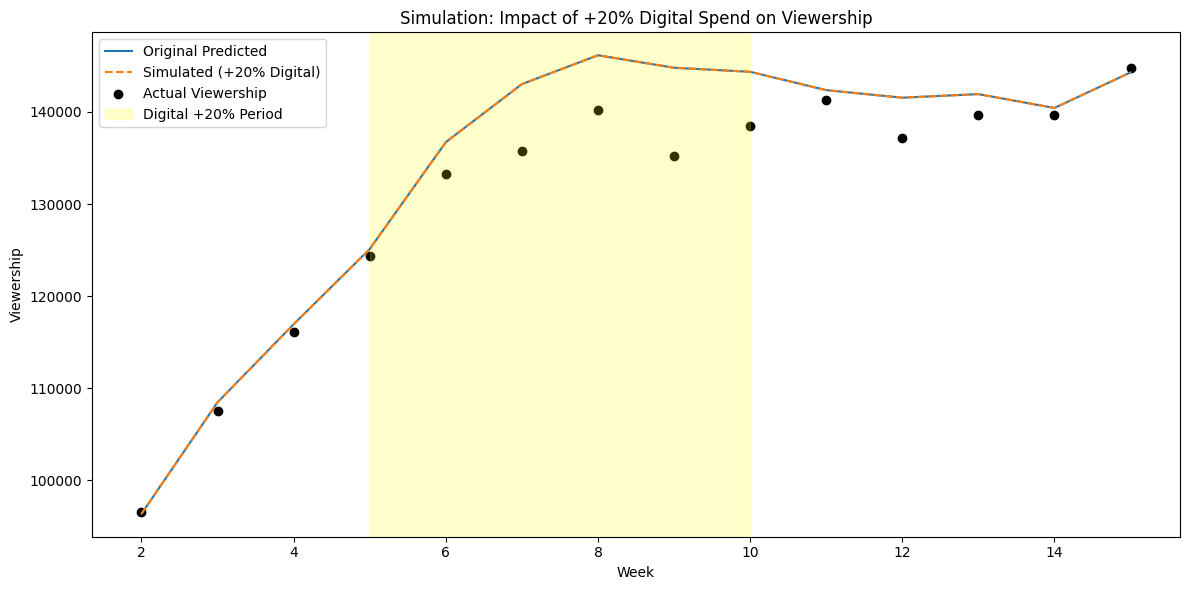

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Copy original dataset
sim_df = weekly_df.copy()

# Choose period to increase digital spend
# Example: Weeks 5 to 10
period_weeks = range(5, 11)

# Apply +20% digital spend for selected weeks
sim_df.loc[sim_df['Week_Number'].isin(period_weeks), 'Digital_Spend'] *= 1.20


# ---- REBUILD TRANSFORMATIONS (Adstock + Saturation) ----
def adstock(series, decay=0.7):
    result = np.zeros(len(series))
    for t in range(len(series)):
        result[t] = series.iloc[t] + (decay * result[t-1] if t > 0 else 0)
    return pd.Series(result, index=series.index)

def hill_transform(x, alpha=1.2, gamma=20000):
    return (x ** alpha) / (x ** alpha + gamma ** alpha)

for col in ["Network_TV_Spend", "Cable_TV_Spend", "Digital_Spend"]:
    sim_df[col + "_ad"] = adstock(sim_df[col])
    sim_df[col + "_adsat"] = hill_transform(sim_df[col + "_ad"])


# ---- Rebuild Lag ----
sim_df = sim_df.sort_values("Air_Date").copy()
sim_df["Lag_Viewership"] = sim_df["True_Viewership"].shift(1)
sim_df = sim_df.dropna()


# ---- Build Model Matrix ----
X_sim = sim_df[[
    "Network_TV_Spend_adsat",
    "Cable_TV_Spend_adsat",
    "Digital_Spend_adsat",
    "Holiday",
    "LeadIn_Bonus",
    "Lag_Viewership"
]]

X_sim = sm.add_constant(X_sim)

# ---- Predict using your final model ----
sim_df["Predicted_Sim"] = as_model.predict(X_sim)
sim_df["Predicted_Actual"] = as_model.predict(X_sim.replace(sim_df["Digital_Spend_adsat"],
                                                            weekly_df_as["Digital_Spend_adsat"]))


# ---- Plot ----
plt.figure(figsize=(12,6))
plt.plot(sim_df["Week_Number"], sim_df["Predicted_Actual"], label="Original Predicted")
plt.plot(sim_df["Week_Number"], sim_df["Predicted_Sim"], label="Simulated (+20% Digital)", linestyle='--')
plt.scatter(sim_df["Week_Number"], sim_df["True_Viewership"], color='black', label="Actual Viewership")

plt.axvspan(5, 10, color='yellow', alpha=0.2, label="Digital +20% Period")
plt.xlabel("Week")
plt.ylabel("Viewership")
plt.title("Simulation: Impact of +20% Digital Spend on Viewership")
plt.legend()
plt.tight_layout()
plt.show()


## Optimized allocation

Purpose

Find the best allocation of spend across Network TV, Cable TV, and Digital under a fixed total budget.

Method

Brute-force search of all combinations (0–100%)

Total spend kept constant

Apply adstock + saturation + lag

Predict viewership for each mix

Select the mix with highest prediction

In [ ]:
import itertools

# Total spend during a chosen week (example: Week 8)
week = 8
total_spend = (
    weekly_df.loc[weekly_df["Week_Number"] == week,
                  ["Network_TV_Spend", "Cable_TV_Spend", "Digital_Spend"]].sum().sum()
)

best_pred = -np.inf
best_mix = None

# Test allocations in increments of 10%
fractions = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

for ntv, ctv, dig in itertools.product(fractions, fractions, fractions):
    if abs((ntv + ctv + dig) - 1) < 1e-6:  # fractions sum to 100%

        # Proposed spend
        spend_ntv = total_spend * ntv
        spend_ctv = total_spend * ctv
        spend_dig = total_spend * dig

        # Build transformations
        ad_ntv = spend_ntv
        ad_ctv = spend_ctv
        ad_dig = spend_dig

        adsat_ntv = hill_transform(ad_ntv)
        adsat_ctv = hill_transform(ad_ctv)
        adsat_dig = hill_transform(ad_dig)

        # Build input row for model
        X_row = pd.DataFrame({
            "const": [1],
            "Network_TV_Spend_adsat": [adsat_ntv],
            "Cable_TV_Spend_adsat": [adsat_ctv],
            "Digital_Spend_adsat": [adsat_dig],
            "Holiday": [0],
            "LeadIn_Bonus": [weekly_df_as.loc[weekly_df_as["Week_Number"] == week, "LeadIn_Bonus"].values[0]],
            "Lag_Viewership": [weekly_df_as.loc[weekly_df_as["Week_Number"] == week, "Lag_Viewership"].values[0]]
        })

        pred = as_model.predict(X_row)[0]

        if pred > best_pred:
            best_pred = pred
            best_mix = (ntv, ctv, dig)

print("Best media allocation:", best_mix)
print("Predicted viewership:", best_pred)


Best media allocation: (0.6, 0, 0.4)
Predicted viewership: 97113162.00984901


choosing week

In [ ]:
import numpy as np

# Total media spend per week
weekly_df_as["Total_Spend"] = (
    weekly_df_as["Network_TV_Spend"] +
    weekly_df_as["Cable_TV_Spend"] +
    weekly_df_as["Digital_Spend"]
)

# Remove weeks where lag is missing
valid_weeks = weekly_df_as[~weekly_df_as["Lag_Viewership"].isna()]["Week_Number"].tolist()

print("Valid weeks:", valid_weeks)
# select the week with the largest total spend (best candidate)
week = weekly_df_as.loc[
    weekly_df_as["Total_Spend"].idxmax(),
    "Week_Number"
]

print("✔ Best week for optimization based on total spend:", week)


Valid weeks: [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
✔ Best week for optimization based on total spend: 6


In [ ]:
import itertools

best_pred = -np.inf
best_mix = None

fractions = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

week_data = weekly_df_as[weekly_df_as["Week_Number"] == week].iloc[0]

total_spend = week_data["Total_Spend"]

for ntv, ctv, dig in itertools.product(fractions, fractions, fractions):
    if abs((ntv + ctv + dig) - 1) < 1e-6:

        # Proposed raw media spend
        s_ntv = total_spend * ntv
        s_ctv = total_spend * ctv
        s_dig = total_spend * dig

        # Apply transformations
        ad_ntv = s_ntv
        ad_ctv = s_ctv
        ad_dig = s_dig

        adsat_ntv = hill_transform(ad_ntv)
        adsat_ctv = hill_transform(ad_ctv)
        adsat_dig = hill_transform(ad_dig)

        # Build row for model prediction
        X_row = pd.DataFrame([{
            "const": 1,
            "Network_TV_Spend_adsat": adsat_ntv,
            "Cable_TV_Spend_adsat": adsat_ctv,
            "Digital_Spend_adsat": adsat_dig,
            "Holiday": week_data["Holiday"],
            "LeadIn_Bonus": week_data["LeadIn_Bonus"],
            "Lag_Viewership": week_data["Lag_Viewership"],
        }])

        pred = as_model.predict(X_row)[0]

        if pred > best_pred:
            best_pred = pred
            best_mix = (ntv, ctv, dig)

print("Best media allocation:", best_mix)
print("Predicted viewership:", best_pred)


Best media allocation: (0.6, 0, 0.4)
Predicted viewership: 97129382.15592305
